## Sammanfattning av text m.h.a llama3

In [ ]:
from langchain_community.llms import Ollama

# 1. Load the text file
with open("input.txt", "r", encoding="utf-8") as f:
    file_text = f.read()

# 2. Initialize the LLM
llm = Ollama(model="llama3")

# 3. Prompt for summarization 
prompt = f"Please summarize the following text into 10 sentences:\n\n{file_text}"

# 4. Get summary
summary = llm.invoke(prompt)

# 5. Print result
print("Summary:\n", summary)

C:\Users\Roman\AppData\Local\Temp\ipykernel_2892\4146336422.py:8: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3")


Summary:
 Here is a summary of the text in 10 sentences:

The Harry Potter series is a fantasy novel series written by J.K. Rowling, which started being published in 1997 and ended in 2007. The books have been incredibly successful, with translations into 73 languages and over 450 million copies sold worldwide. The Swedish translations were done by Lena Fries-Gedin. The series has also been adapted into films, starring Daniel Radcliffe as Harry Potter, with the first film released in 2001. The books have received praise for inspiring many children to read and criticism from some religious groups who believe they promote witchcraft. The name Harry became more popular in Sweden during the 2000s, possibly due to the series' popularity. There are seven books in the series: "Harry Potter and the Philosopher's Stone", "Harry Potter and the Chamber of Secrets", "Harry Potter and the Prisoner of Azkaban", "Harry Potter and the Goblet of Fire", "Harry Potter and the Order of the Phoenix", "Harr

## Identifiering av sporter med llama3

### Resultat: dåligt
- Nämner endast sporter i början av texten, listar samma sport flera gånger.

In [69]:
from langchain_ollama import OllamaLLM

def chunk_text(text, max_len=6000):
    return [text[i:i+max_len] for i in range(0, len(text), max_len)]

with open("sport_test.txt", "r", encoding="utf-8") as f:
    text = f.read()

llm = OllamaLLM(model="llama3")
chunks = chunk_text(text, max_len=6000)  # Chunk size can be adjusted

all_results = []

for i, chunk in enumerate(chunks):
    prompt = f"""
The following is a list of scientific article entries. Your task is to identify which sport each article is about.
Each article starts with PT and ends with ER. 
Only use PT markers that start a line (i.e., PT C or PT J).
Return your output as a Markdown table with two columns:
1. A short title or identifying phrase from the article
2. The name of the sport in curly brackets like {{soccer}}

If no sport is clearly mentioned, return {{Unknown}}.
Do not include any sport unless it is wrapped in curly brackets.

Text:
{chunk}
"""
    print(f"Processing chunk {i+1} / {len(chunks)}")  # Optional: to track progress
    response = llm.invoke(prompt)
    all_results.append(response)

# Print all results
print("\n\n".join(all_results))

Processing chunk 1 / 12
Processing chunk 2 / 12
Processing chunk 3 / 12
Processing chunk 4 / 12
Processing chunk 5 / 12
Processing chunk 6 / 12
Processing chunk 7 / 12
Processing chunk 8 / 12
Processing chunk 9 / 12
Processing chunk 10 / 12
Processing chunk 11 / 12
Processing chunk 12 / 12
Here is the output in Markdown table format:

| Short Title | Sport |
| --- | --- |
| Conceptualization of Human Soccer Concepts to Robotic Soccer Architecture | {soccer} |
| Performing more than 20 purposeful gameplay headers in a soccer season may alter autonomic function in female youth soccer players | {soccer} |
| Perceived Soccer Literacy: A Construct Linking Soccer Video Games Play to Soccer Engagement | {soccer} |
| Direct player observation is needed to accurately quantify heading frequency in youth soccer | {soccer} |

Note: The sports are all wrapped in curly brackets ({soccer}) since only one sport is mentioned in each article.

Here is the output in Markdown table format:

| Short Title 

In [ ]:
from langchain_ollama import OllamaLLM

def chunk_text(text, max_len=6000):
    return [text[i:i+max_len] for i in range(0, len(text), max_len)]

with open("sport_test.txt", "r", encoding="utf-8") as f:
    text = f.read()

llm = OllamaLLM(model="mistral")
chunks = chunk_text(text, max_len=6000) 

all_results = []

for i, chunk in enumerate(chunks):
    prompt = f"""
The following is a list of scientific article entries. Your task is to identify which sport each article is about.
Each article starts with PT and ends with ER. 
Only use PT markers that start a line (i.e., PT C or PT J).
Return your output as a Markdown table with two columns:
1. A short title or identifying phrase from the article
2. The name of the sport in curly brackets like {{soccer}}

If no sport is clearly mentioned, return {{Unknown}}.
Do not include any sport unless it is wrapped in curly brackets.

Text:
{chunk}
"""
    print(f"Processing chunk {i+1} / {len(chunks)}") 
    response = llm.invoke(prompt)
    all_results.append(response)

print("\n\n".join(all_results))




Processing chunk 1 / 12
Processing chunk 2 / 12
Processing chunk 3 / 12
Processing chunk 4 / 12
Processing chunk 5 / 12
Processing chunk 6 / 12
Processing chunk 7 / 12
Processing chunk 8 / 12
Processing chunk 9 / 12
Processing chunk 10 / 12
Processing chunk 11 / 12
Processing chunk 12 / 12
 | Title                                                                                                                        | Sport           |
   |---------------------------------------------------------------------------------------------------------------------------|-----------------|
   | Conceptualization of Human Soccer Concepts to Robotic Soccer Architecture | {Robotics Soccer}  |
   | Performing more than 20 purposeful gameplay headers in a soccer season may alter autonomic function in female youth soccer players | {Soccer}         |
   | Perceived Soccer Literacy: A Construct Linking Soccer Video Games Play to Soccer Engagement                              | {Unknown}        |
   | Dir

In [ ]:

chunks = chunk_text(text, max_len=6000)


all_results = []
for i, chunk in enumerate(chunks):
    prompt = f"""
The following is a list of scientific article entries. Your task is to identify which sport each article is about.
Each article starts with PT and ends with ER. 
Only use PT markers that start a line (i.e., PT C or PT J).
Return your output as a Markdown table with two columns:
1. A short title or identifying phrase from the article
2. The name of the sport in curly brackets like {{soccer}}

If no sport is clearly mentioned, return {{Unknown}}.
Do not include any sport unless it is wrapped in curly brackets.

Text:
{chunk}
"""
    print(f"🔍 Processing chunk {i + 1} / {len(chunks)}")
    response = llm.invoke(prompt)
    all_results.append(response)


raw_output = "\n\n".join(all_results)

sports = re.findall(r"\{([^{}]+)\}", raw_output)

normalized_sports = [normalize_sport_name(s) for s in sports if s]
sport_counts = Counter(normalized_sports)

print("\nArticle count by sport:\n")
for sport, count in sport_counts.most_common():
    print(f"{sport}: {count}")


🔍 Processing chunk 1 / 12
🔍 Processing chunk 2 / 12
🔍 Processing chunk 3 / 12
🔍 Processing chunk 4 / 12
🔍 Processing chunk 5 / 12
🔍 Processing chunk 6 / 12
🔍 Processing chunk 7 / 12
🔍 Processing chunk 8 / 12
🔍 Processing chunk 9 / 12
🔍 Processing chunk 10 / 12
🔍 Processing chunk 11 / 12
🔍 Processing chunk 12 / 12

✅ Article count by sport:

Soccer: 10
Basketball: 10
Volleyball: 9
Tennis: 9
Volleyball, Beach_Volleyball: 1
Paddle-Tennis: 1
Table Tennis: 1


In [ ]:
import os
import json
import re
import csv
from collections import Counter
from langchain_ollama import OllamaLLM


class SportCategorizer:
    def __init__(self, keywords_path="sports_keywords.json"):
        if not os.path.exists(keywords_path):
            raise FileNotFoundError(f"Keyword file not found: {keywords_path}")

        with open(keywords_path, "r", encoding="utf-8") as f:
            raw_keywords = json.load(f)

        self.modifiers = {
            "gas", "beach", "robotic", "video", "games", "cardio", "indoor",
            "outdoor", "simulation", "virtual", "adaptive", "wheelchair",
            "para", "cyber", "street", "extreme"
        }

        self.canonical_keywords = {
            self._normalize_key(k): v for k, v in raw_keywords.items()
        }
        self.sorted_keywords = sorted(self.canonical_keywords.keys(), key=len, reverse=True)
        self.llm = OllamaLLM(model="gemma3")
        self.results = []  # For CSV output

    def _normalize_key(self, key):
        name_clean = re.sub(r"[^a-zA-Z\s\-]", "", key).strip().lower()
        tokens = name_clean.split()
        filtered_tokens = [t for t in tokens if t not in self.modifiers]
        return " ".join(filtered_tokens)

    def normalize_sport_name(self, raw_name):
        if not raw_name:
            return "Unknown"

        name_clean = re.sub(r"[^a-zA-Z\s\-]", "", raw_name).strip().lower()
        tokens = name_clean.split()
        filtered_tokens = [t for t in tokens if t not in self.modifiers]
        cleaned = " ".join(filtered_tokens)

        if cleaned in self.canonical_keywords:
            return self.canonical_keywords[cleaned]

        token_set = set(filtered_tokens)
        for keyword in self.sorted_keywords:
            if set(keyword.split()) <= token_set:
                return self.canonical_keywords[keyword]

        print(f"⚠️ No match for cleaned: '{cleaned}' from raw: '{raw_name}'")
        return "Unknown"

    def extract_articles(self, raw_text):
        articles = []
        entries = re.split(r"(?=^PT\s)", raw_text, flags=re.MULTILINE)
        for entry in entries:
            if not entry.strip():
                continue

            title_match = re.search(r"(?m)^TI\s+(.+)", entry)
            abstract_match = re.search(r"(?m)^AB\s+(.+?)(?=^(?:[A-Z]{2}|ER)\s)", entry, re.DOTALL | re.MULTILINE)

            title = title_match.group(1).strip() if title_match else ""
            abstract = abstract_match.group(1).strip().replace("\n", " ") if abstract_match else ""

            articles.append({"title": title, "abstract": abstract})

        return articles


    def build_prompt(self, articles):
        prompt = (
            "You will be given a list of article titles and abstracts. "
            "Your task is to identify the sport each article is **primarily about**.\n\n"
            "Only classify an article if the sport is the main focus of the study. "
            "Do not classify based on incidental mentions or comparisons.\n\n"
            "Return a markdown table with two columns:\n"
            "1. Short title\n"
            "2. The sport in curly braces like {soccer}. Use {Unknown} if unclear.\n\n"
            "### Articles ###\n\n"
        )
        for art in articles:
            short = art["title"][:100] + "..." if len(art["title"]) > 100 else art["title"]
            prompt += f"- **{short}**\n  {art['abstract'][:300]}...\n"
        return prompt

    def run(self, input_path, output_csv="classified_sports.csv"):
        with open(input_path, "r", encoding="utf-8") as f:
            text = f.read()

        articles = self.extract_articles(text)
        chunks = [articles[i:i + 10] for i in range(0, len(articles), 10)]
        all_sports = []

        for i, chunk in enumerate(chunks):
            print(f"🧠 Analyzing chunk {i+1}/{len(chunks)}...")
            prompt = self.build_prompt(chunk)
            response = self.llm.invoke(prompt)
            print(f"\n Raw model response:\n{response}\n{'='*60}")
            all_sports.extend(self.parse_response(response, chunk))

        counts = Counter(all_sports)
        self.display_results(counts)
        self.save_csv(output_csv)

    def parse_response(self, response_text, chunk_articles):
        sports = []

        sport_lines = [line for line in response_text.splitlines() if "{" in line]

        for i, article in enumerate(chunk_articles):
            raw_title = article.get("title", "")
            title = raw_title.strip() if raw_title.strip() else "Untitled"

            sport = "Unknown"
            if i < len(sport_lines):
                match = re.search(r"\{([^}]+)\}", sport_lines[i])
                if match:
                    raw_sport = match.group(1).strip()
                    sport = self.normalize_sport_name(raw_sport)

            self.results.append({"title": title, "sport": sport})
            print(f"🔍 [{i+1}] Title: {title[:60]}... → Sport: {sport}")
            sports.append(sport)

        return sports


    def save_csv(self, filename):
        print(f"\n💾 Saving results to CSV: {filename}")
        with open(filename, "w", newline='', encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=["title", "sport"])
            writer.writeheader()
            for row in self.results:
                writer.writerow(row)

    def display_results(self, counter):
        print("\nFinal counts:\n")
        for sport, count in counter.most_common():
            print(f"{sport}: {count}")
        print(f"\n📦 Total articles classified: {sum(counter.values())}")


#Run as script
if __name__ == "__main__":
    categorizer = SportCategorizer()
    categorizer.run("sport_test.txt", output_csv="classified_articles.csv")



🧠 Analyzing chunk 1/4...

 Raw model response:
Here's the markdown table classifying the articles by sport:

| Short title | The sport |
|---|---|
| Conceptualization of Human Soccer Concepts to Robotic Soccer | {soccer} |
| Performing more than 20 purposeful gameplay headers in a soccer season | {soccer} |
| Perceived Soccer Literacy: A Construct Linking Soccer Video Games Play | {soccer} |
| Direct player observation is needed to accurately quantify heading | {soccer} |
| Soccer-Specific Endurance and Running Economy in Soccer Players With | {soccer} |
| Soccer, images and professionalization: soccer plays with every teenage | {soccer} |
| Leadership Power Perceptions of Soccer Coaches and Soccer Players | {soccer} |
| The biomechanics of soccer: A review | {soccer} |
| Evidence on soccer-specific stadiums and attendance: The Major League | {soccer} |
| Assessing visual attention using soccer game videos in elite female | {soccer} |

🔍 [1] Title: Conceptualization of Human Soccer Con

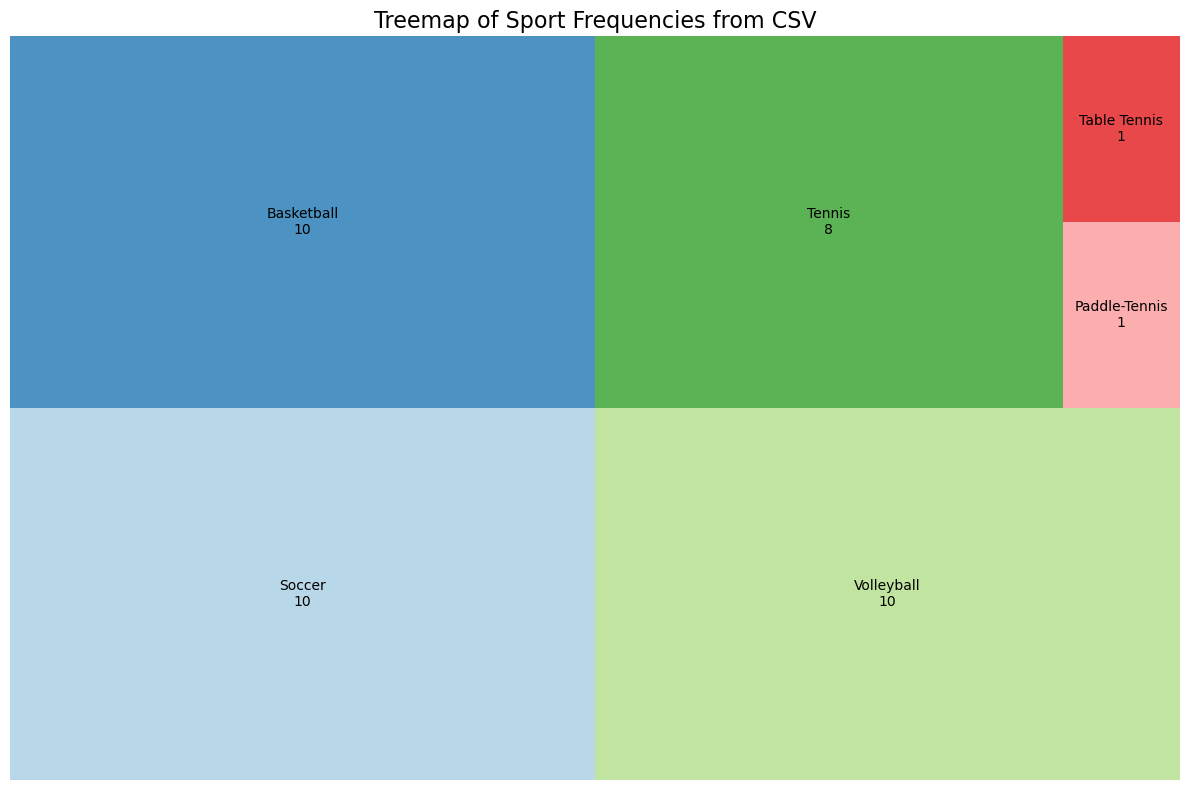

In [ ]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import squarify

def load_sports_from_csv(csv_file):
    with open(csv_file, newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        sports = [row["sport"] for row in reader if row["sport"]]
    return Counter(sports)

def plot_treemap(counter):
    labels = [f"{sport}\n{count}" for sport, count in counter.items()]
    sizes = list(counter.values())
    colors = plt.cm.Paired(range(len(sizes)))

    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
    plt.title("Treemap of Sport Frequencies from CSV", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

#Run
if __name__ == "__main__":
    csv_path = "classified_articles.csv"
    counts = load_sports_from_csv(csv_path)
    plot_treemap(counts)


In [ ]:
import os
import json
import re
import csv
from collections import Counter
from langchain_ollama import OllamaLLM

class SportCategorizer:
    # Initialize the categorizer, load keywords, prepare modifiers and LLM
    def __init__(self, keywords_path="sports_keywords.json"):
        if not os.path.exists(keywords_path):
            raise FileNotFoundError(f"Keyword file not found: {keywords_path}")
        with open(keywords_path, "r", encoding="utf-8") as f:
            raw_keywords = json.load(f)

        self.modifiers = {
            "gas", "beach", "robotic", "video", "games", "cardio", "indoor",
            "outdoor", "simulation", "virtual", "adaptive", "wheelchair",
            "para", "cyber", "street", "extreme"
        }

        self.canonical_keywords = {
            self._normalize_key(k): v for k, v in raw_keywords.items()
        }
        self.sorted_keywords = sorted(self.canonical_keywords.keys(), key=len, reverse=True)
        self.llm = OllamaLLM(model="gemma3:27b")
        self.results = []

    # Normalize a keyword by removing modifiers and punctuation
    def _normalize_key(self, key):
        name_clean = re.sub(r"[^a-zA-Z\s\-]", "", key).strip().lower()
        tokens = name_clean.split()
        filtered_tokens = [t for t in tokens if t not in self.modifiers]
        return " ".join(filtered_tokens)

    # Clean and match raw sport names to canonical form or return "Unknown"
    def normalize_sport_name(self, raw_name):
        if not raw_name:
            return "Unknown"
        name_clean = re.sub(r"[^a-zA-Z\s\-]", "", raw_name).strip().lower()
        tokens = name_clean.split()
        filtered_tokens = [t for t in tokens if t not in self.modifiers]
        cleaned = " ".join(filtered_tokens)
        if cleaned in self.canonical_keywords:
            return self.canonical_keywords[cleaned]
        token_set = set(filtered_tokens)
        for keyword in self.sorted_keywords:
            if set(keyword.split()) <= token_set:
                return self.canonical_keywords[keyword]
        print(f" No match for cleaned: '{cleaned}' from raw: '{raw_name}'")
        return "Unknown"

    # Extract article titles and abstracts from the input text format
    def extract_articles(self, raw_text):
        articles = []
        entries = re.split(r"(?=^PT\s)", raw_text, flags=re.MULTILINE)
        for entry in entries:
            if not entry.strip():
                continue
            title_match = re.search(r"(?m)^TI\s+(.+)", entry)
            abstract_match = re.search(r"(?m)^AB\s+(.+?)(?=^(?:[A-Z]{2}|ER)\s)", entry, re.DOTALL | re.MULTILINE)
            title = title_match.group(1).strip() if title_match else ""
            abstract = abstract_match.group(1).strip().replace("\n", " ") if abstract_match else ""
            articles.append({"title": title, "abstract": abstract})
        return articles

    # Build a prompt for the LLM using article data
    def build_prompt(self, articles):
        prompt = (
            "You will be given a list of article titles and abstracts. "
            "Your task is to identify the sport each article is **primarily about**.\n\n"
            "Only classify an article if the sport is the main focus of the study. "
            "Do not classify based on incidental mentions or comparisons.\n\n"
            "Return a markdown table with two columns:\n"
            "1. Short title\n"
            "2. The sport in curly braces like {soccer}. Use {Unknown} if unclear.\n\n"
            "### Articles ###\n\n"
        )
        for art in articles:
            short = art["title"][:100] + "..." if len(art["title"]) > 100 else art["title"]
            prompt += f"- **{short}**\n  {art['abstract'][:300]}...\n"
        return prompt

    # Run the full pipeline: load data, analyze with LLM, and output results
    def run(self, input_path, output_csv="classified_sports.csv"):
        with open(input_path, "r", encoding="utf-8") as f:
            text = f.read()
        articles = self.extract_articles(text)
        chunks = [articles[i:i + 10] for i in range(0, len(articles), 10)]
        all_sports = []
        for i, chunk in enumerate(chunks):
            print(f" Analyzing chunk {i+1}/{len(chunks)}...")
            prompt = self.build_prompt(chunk)
            response = self.llm.invoke(prompt)
            print(f"\n Raw model response:\n{response}\n{'='*60}")
            all_sports.extend(self.parse_response(response, chunk))
        counts = Counter(all_sports)
        self.display_results(counts)
        self.save_csv(output_csv)

    # Parse the LLM response and extract the predicted sports
    def parse_response(self, response_text, chunk_articles):
        sports = []
        sport_lines = [line for line in response_text.splitlines() if "{" in line]
        for i, article in enumerate(chunk_articles):
            raw_title = article.get("title", "")
            title = raw_title.strip() if raw_title.strip() else "Untitled"
            sport = "Unknown"
            if i < len(sport_lines):
                match = re.search(r"\{([^}]+)\}", sport_lines[i])
                if match:
                    raw_sport = match.group(1).strip()
                    sport = self.normalize_sport_name(raw_sport)
            self.results.append({"title": title, "sport": sport})
            print(f"🔍 [{i+1}] Title: {title[:60]}... → Sport: {sport}")
            sports.append(sport)
        return sports

    # Save the final classification results into a CSV file
    def save_csv(self, filename):
        print(f"\n Saving results to CSV: {filename}")
        with open(filename, "w", newline='', encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=["title", "sport"])
            writer.writeheader()
            for row in self.results:
                writer.writerow(row)

    # Print a summary count of classified sports to the console
    def display_results(self, counter):
        print("\n Final counts:\n")
        for sport, count in counter.most_common():
            print(f"{sport}: {count}")
        print(f"\n Total articles classified: {sum(counter.values())}")




In [4]:
categorizer = SportCategorizer()
categorizer.run("sport_test.txt", output_csv="classified_articles.csv")


 Analyzing chunk 1/4...

 Raw model response:
Here's a markdown table classifying the sport each article is primarily about:

| Short title | Sport |
|---|---|
| Conceptualization of Human Soccer Concepts | {soccer} |
| Performing more than 20 purposeful gameplay headers | {soccer} |
| Perceived Soccer Literacy | {soccer} |
| Direct player observation is needed to accurately quantify heading | {soccer} |
| Soccer-Specific Endurance and Running Economy | {soccer} |
| Soccer, images and professionalization | {soccer} |
| Leadership Power Perceptions of Soccer Coaches | {soccer} |
| The biomechanics of soccer | {soccer} |
| Evidence on soccer-specific stadiums | {soccer} |
| Assessing visual attention using soccer game videos | {soccer} | 

🔍 [1] Title: Conceptualization of Human Soccer Concepts to Robotic Soccer... → Sport: Soccer
🔍 [2] Title: Performing more than 20 purposeful gameplay headers in a soc... → Sport: Soccer
🔍 [3] Title: Perceived Soccer Literacy: A Construct Linking Soccer

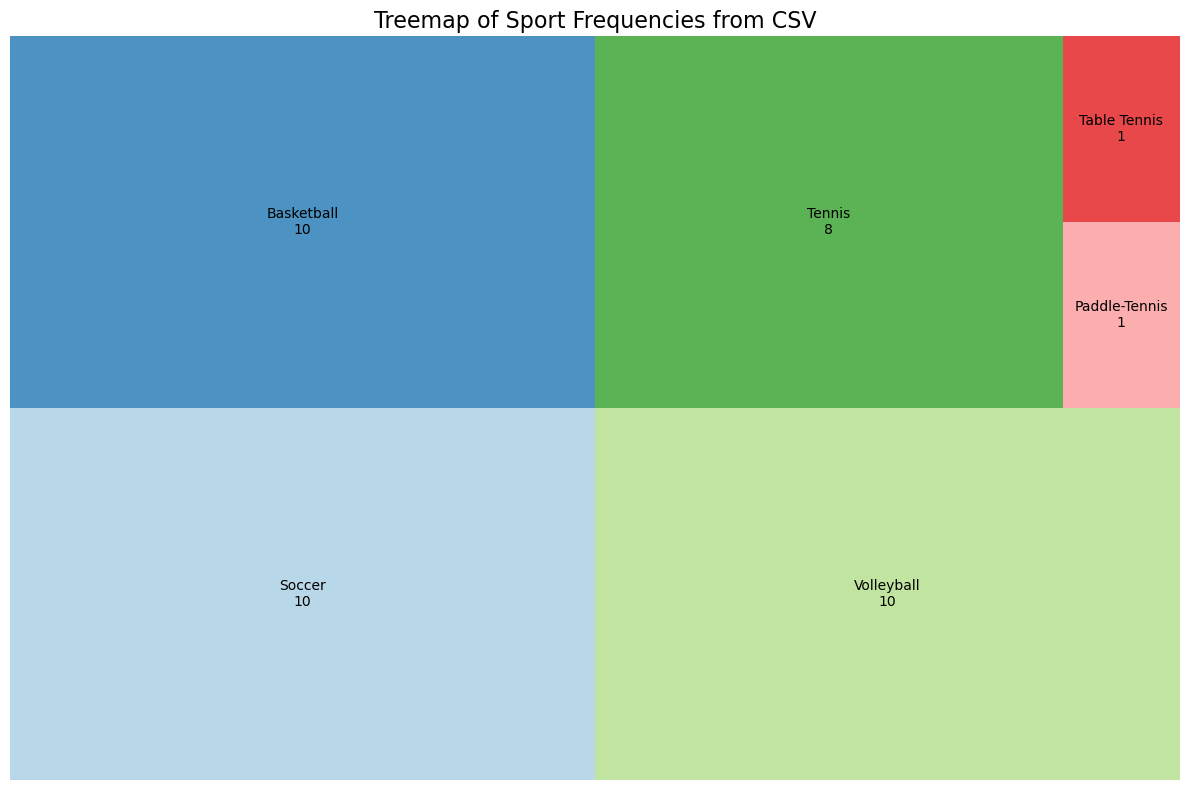

In [ ]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import squarify

def load_sports_from_csv(csv_file):
    with open(csv_file, newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        sports = [row["sport"] for row in reader if row["sport"]]
    return Counter(sports)

def plot_treemap(counter):
    labels = [f"{sport}\n{count}" for sport, count in counter.items()]
    sizes = list(counter.values())
    colors = plt.cm.Paired(range(len(sizes)))

    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
    plt.title("Treemap of Sport Frequencies from CSV", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Run 
if __name__ == "__main__":
    csv_path = "classified_articles.csv"
    counts = load_sports_from_csv(csv_path)
    plot_treemap(counts)

# Identify sport, technology, UT and year

In [ ]:
import csv
import re
from langchain.llms import Ollama
from langchain.prompts import PromptTemplate

def parse_articles(text: str):
    raw_articles = text.strip().split('ER\n\n')
    articles = []
    for raw_article in raw_articles:
        if not raw_article.strip():
            continue

        # Only parse if there's at least a "TI" somewhere
        if not re.search(r'^TI ', raw_article, re.MULTILINE):
            continue

        title_match = re.search(r'^TI (.+?)(?=\n[A-Z]{2} |\n$)', raw_article, re.MULTILINE | re.DOTALL)
        title = title_match.group(1).strip() if title_match else "No title"

        abstract_match = re.search(r'^AB (.+?)(?=\n[A-Z]{2} |\n$)', raw_article, re.MULTILINE | re.DOTALL)
        abstract = abstract_match.group(1).strip() if abstract_match else "No abstract"

        # Extract year from PY field
        year_match = re.search(r'^PY (\d{4})', raw_article, re.MULTILINE)
        year = year_match.group(1) if year_match else "Unknown"

        # Extract UT (WOS) field
        ut_match = re.search(r'^UT (.+)', raw_article, re.MULTILINE)
        ut = ut_match.group(1).strip() if ut_match else "Unknown"

        articles.append((title, abstract, year, ut))

    return articles




def extract_info_from_response(response: str):
    sport_match = re.search(r"\|\s*.+?\s*\|\s*\{(.+?)\}\s*\|", response)
    tech_match = re.search(r"\|\s*.+?\s*\|\s*\{.+?\}\s*\|\s*\d{4}\s*\|\s*(.+?)\s*\|", response)

    sport = sport_match.group(1).strip().lower() if sport_match else "unknown"
    technology = tech_match.group(1).strip() if tech_match else "unknown"

    return sport, technology

prompt_template = """
You will be given a list of article titles, publication years, and abstracts. 
Your task is to identify the sport the provided article is **primarily about**.

Only classify an article if the sport is the main focus of the study. 
Do not classify based on incidental mentions or comparisons.

Identify any **technology** areas that the article focuses on.
   - Focus on tangible research tools, measurement technologies, data collection, modeling, sensors, AI systems, software frameworks, etc.
   - Examples include: wearables, GPS, AI, computer vision, video analysis, machine learning, sensors, biomechanics, force plates, EMG, motion capture, etc.
   - Do **not** list general outcome variables (like "heart rate variability") unless a measurement technology is used to capture them (e.g., ECG, wearables).
   - If multiple technologies are involved, separate them with commas.
   - If no technology focus is evident, write {{None}}.


Return a markdown table with 4 columns:
1. Short title
2. The sport in curly braces like {{Soccer}}. Use {{Unknown}} if unclear.
3. Publishing year.
4. Technology.

### Article ###

Title: {title}
Year: {year}
Abstract: {abstract}

### Result ###
"""


async def main():
    with open('sport_test.txt', 'r', encoding='utf-8') as f:
        text = f.read()

    articles = parse_articles(text)
    llm = Ollama(model="gemma3:27b") 

    results = []

    for title, abstract, year, ut in articles:
        prompt = PromptTemplate(
            input_variables=["title", "year", "abstract"],
            template=prompt_template
        ).format(title=title, year=year, abstract=abstract)

        response = await llm.apredict(prompt)

        sport, technology = extract_info_from_response(response)
        technology = technology.replace("{", "").replace("}", "").strip()
        clean_title = re.sub(r'\s+', ' ', title).strip()

        print(f"Title: {clean_title}\nYear: {year}\nUT: {ut}\nSport: {sport}\nTechnology: {technology}\n{'='*60}\n")

        results.append({
            "title": clean_title,
            "year": year,
            "ut": ut,
            "sport": sport,
            "technology": technology
        })


    # Save results to CSV
    with open("article_sports.csv", "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=["title", "year", "ut", "sport", "technology"])
        writer.writeheader()
        writer.writerows(results)


    print(f"\n✅ Total articles processed: {len(results)}\n")

# In notebook, run:
await main()

# Or in a script:
# import asyncio
# asyncio.run(main())

Title: Conceptualization of Human Soccer Concepts to Robotic Soccer Architecture
Year: 2010
UT: WOS:000406956500086
Sport: soccer
Technology: Software

Title: Performing more than 20 purposeful gameplay headers in a soccer season may alter autonomic function in female youth soccer players
Year: 2021
UT: WOS:000619037800001
Sport: soccer
Technology: ECG

Title: Perceived Soccer Literacy: A Construct Linking Soccer Video Games Play to Soccer Engagement
Year: 2024
UT: WOS:001243808700005
Sport: soccer
Technology: Structural equation modeling

Title: Direct player observation is needed to accurately quantify heading frequency in youth soccer
Year: 2018
UT: WOS:000428596900007
Sport: soccer
Technology: Video analysis

Title: Soccer-Specific Endurance and Running Economy in Soccer Players With Cerebral Palsy
Year: 2011
UT: WOS:000296027100005
Sport: soccer
Technology: None

Title: Soccer, images and professionalization: soccer plays with every teenage dream
Year: 2012
UT: WOS:000306060600006

# Identify also with PICO

In [ ]:
import csv
import re
from langchain.llms import Ollama
from langchain.prompts import PromptTemplate

def parse_articles(text: str):
    raw_articles = text.strip().split('ER\n\n')
    articles = []
    for raw_article in raw_articles:
        if not raw_article.strip():
            continue

        if not re.search(r'^TI ', raw_article, re.MULTILINE):
            continue

        title_match = re.search(r'^TI (.+?)(?=\n[A-Z]{2} |\n$)', raw_article, re.MULTILINE | re.DOTALL)
        title = title_match.group(1).strip() if title_match else "No title"

        abstract_match = re.search(r'^AB (.+?)(?=\n[A-Z]{2} |\n$)', raw_article, re.MULTILINE | re.DOTALL)
        abstract = abstract_match.group(1).strip() if abstract_match else "No abstract"

        year_match = re.search(r'^PY (\d{4})', raw_article, re.MULTILINE)
        year = year_match.group(1) if year_match else "Unknown"

        ut_match = re.search(r'^UT (.+)', raw_article, re.MULTILINE)
        ut = ut_match.group(1).strip() if ut_match else "Unknown"

        articles.append((title, abstract, year, ut))

    return articles

def extract_info_from_response(response: str):
    sport_match = re.search(r"\|\s*.+?\s*\|\s*\{(.+?)\}\s*\|", response)
    tech_match = re.search(r"\|\s*.+?\s*\|\s*\{.+?\}\s*\|\s*\d{4}\s*\|\s*(.+?)\s*\|", response)

    sport = sport_match.group(1).strip().lower() if sport_match else "unknown"
    technology = tech_match.group(1).strip() if tech_match else "unknown"

    return sport, technology

def extract_pico_from_response(response: str):
    def extract(field):
        match = re.search(rf"{field}:(.*)", response, re.IGNORECASE)
        if match:
            return match.group(1).strip().replace("{", "").replace("}", "").replace("None", "").strip()
        return ""

    p = extract('P')
    i = extract('I')
    c = extract('C')
    o = extract('O')

    return p, i, c, o

classification_prompt_template = """
You will be given a list of article titles, publication years, and abstracts. 
Your task is to identify the sport the provided article is **primarily about**.

Only classify an article if the sport is the main focus of the study. 
Do not classify based on incidental mentions or comparisons.

Identify any **technology** areas that the article focuses on.
   - Focus on tangible research tools, measurement technologies, data collection, modeling, sensors, AI systems, software frameworks, etc.
   - Examples include: wearables, GPS, AI, computer vision, video analysis, machine learning, sensors, biomechanics, force plates, EMG, motion capture, etc.
   - Do **not** list general outcome variables (like "heart rate variability") unless a measurement technology is used to capture them (e.g., ECG, wearables).
   - If multiple technologies are involved, separate them with commas.
   - If no technology focus is evident, write {{None}}.

Return a markdown table with 4 columns:
1. Short title
2. The sport in curly braces like {{Soccer}}. Use {{Unknown}} if unclear.
3. Publishing year.
4. Technology.

### Article ###

Title: {title}
Year: {year}
Abstract: {abstract}

### Result ###
"""

pico_prompt_template = """
You will be given the title and abstract of a research article. Extract the following PICO elements:

P = Population / Participants / Subjects
I = Intervention / Exposure / Index factor
C = Comparison / Control (if any)
O = Outcome(s) studied

If a component does not exist or cannot be identified, write {{None}}.

### Article ###

Title: {title}
Abstract: {abstract}

### PICO Extraction ###

P: ...
I: ...
C: ...
O: ...
"""

async def main():
    with open('sport_test.txt', 'r', encoding='utf-8') as f:
        text = f.read()

    articles = parse_articles(text)
    llm = Ollama(model="gemma3")

    results = []

    for title, abstract, year, ut in articles:
        # Step 1: Run classification prompt
        classification_prompt = PromptTemplate(
            input_variables=["title", "year", "abstract"],
            template=classification_prompt_template
        ).format(title=title, year=year, abstract=abstract)

        classification_response = await llm.apredict(classification_prompt)
        sport, technology = extract_info_from_response(classification_response)
        technology = technology.replace("{", "").replace("}", "").strip()

        # Step 2: Run PICO prompt
        pico_prompt = PromptTemplate(
            input_variables=["title", "abstract"],
            template=pico_prompt_template
        ).format(title=title, abstract=abstract)

        pico_response = await llm.apredict(pico_prompt)
        p, i, c, o = extract_pico_from_response(pico_response)

        clean_title = re.sub(r'\s+', ' ', title).strip()

        print(f"Title: {clean_title}\nYear: {year}\nUT: {ut}\nSport: {sport}\nTechnology: {technology}\nP: {p}\nI: {i}\nC: {c}\nO: {o}\n{'='*60}\n")

        results.append({
            "title": clean_title,
            "year": year,
            "ut": ut,
            "sport": sport,
            "technology": technology,
            "p": p,
            "i": i,
            "c": c,
            "o": o
        })

    # Save results to CSV
    with open("article_sports.csv", "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=["title", "year", "ut", "sport", "technology", "p", "i", "c", "o"])
        writer.writeheader()
        writer.writerows(results)

    print(f"\nTotal articles processed: {len(results)}\n")


In [2]:
await main()


C:\Users\Roman\AppData\Local\Temp\ipykernel_14416\3549868974.py:112: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="gemma3")
C:\Users\Roman\AppData\Local\Temp\ipykernel_14416\3549868974.py:123: LangChainDeprecationWarning: The method `BaseLLM.apredict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~ainvoke` instead.
  classification_response = await llm.apredict(classification_prompt)


Title: Conceptualization of Human Soccer Concepts to Robotic Soccer Architecture
Year: 2010
UT: WOS:000406956500086
Sport: soccer
Technology: Simulation, RoboCup, Computer vision, AI systems, Software frameworks
P: ** Human soccer coaches, players, teams (implicitly – the intended users of the defined concepts)
I: ** A standardized definition of human soccer concepts (coach, player, role, play/move, formation, tactic, strategy)
C: **  – The article focuses on proposing a definition and its application, not on comparing different approaches.
O: ** Description of teams, strategies, and dealing with match dynamics to facilitate the application of human soccer concepts in robotic soccer.

Title: Performing more than 20 purposeful gameplay headers in a soccer season may alter autonomic function in female youth soccer players
Year: 2021
UT: WOS:000619037800001
Sport: soccer
Technology: electrocardiogram, heart rate variability, wearables
P: ** Female youth soccer players (specifically, those

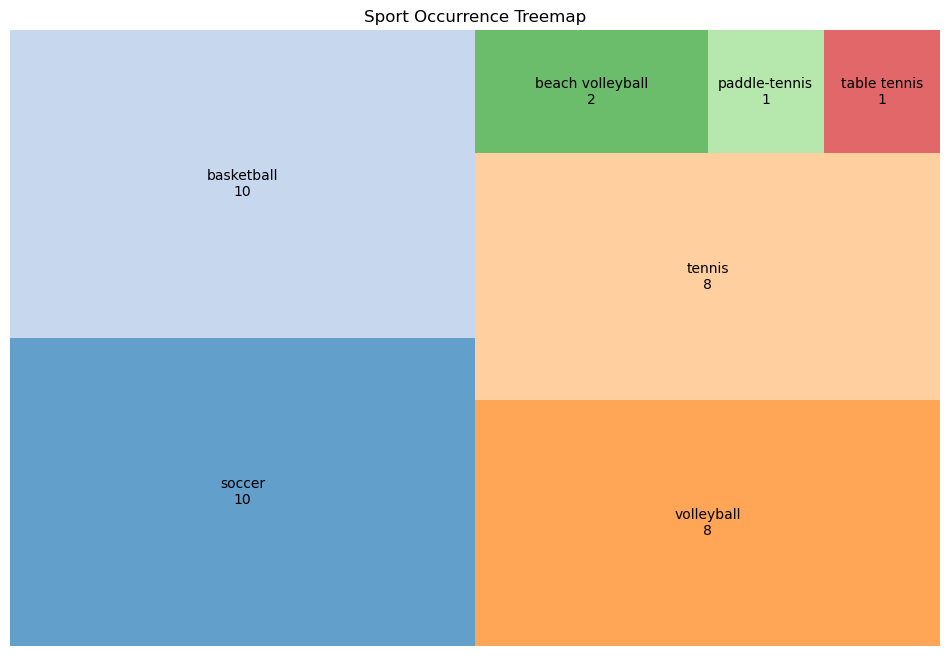

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # pip install squarify

# Load CSV
df = pd.read_csv('article_sports.csv')

# Count sports (case-insensitive)
sport_counts = df['sport'].str.lower().value_counts()

# Prepare data for squarify
labels = [f"{sport}\n{count}" for sport, count in zip(sport_counts.index, sport_counts.values)]
sizes = sport_counts.values

# Plot
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=plt.cm.tab20.colors)
plt.title("Sport Occurrence Treemap")
plt.axis('off')
plt.show()



